In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

: 

In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import DataConversionWarning
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [15]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [16]:
y = train["SalePrice"]
X = train.drop(["SalePrice","Id"],axis = 1)
test = test.drop(["Id"],axis = 1)
df = pd.concat([X,test])


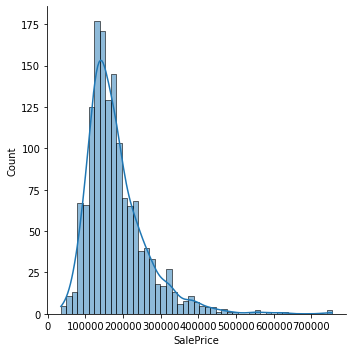

In [17]:
sns.displot(y,kde = True)

<list>
<li> <b> positive skewness
<li> <b> peak
</list>


In [18]:
print ("Skewness: %f" % y.skew())
print ("Kurtosis: %f" % y.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
X_train, X_valid, y_df,y_valid = train_test_split(X, y,train_size=0.8,random_state=0)

In [479]:
train.corr().nlargest(15,"SalePrice")

/var/folders/2f/wyk0znv51gl7345gxs6cvhyc0000gn/T/ipykernel_46492/3780229531.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().nlargest(15,"SalePrice")


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [ ]:
train.drop(["Id"],axis = 1).corr().nlargest(15,"SalePrice")

/var/folders/2f/wyk0znv51gl7345gxs6cvhyc0000gn/T/ipykernel_46492/1721823899.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.drop(["Id"],axis = 1).corr().nlargest(15,"SalePrice")


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


### Dealing with the missing values

In [19]:
missing_vals = df.isnull().sum()
percent_missing = (missing_vals[missing_vals>0]/df[missing_vals.index].shape[0]).sort_values(ascending=False)

In [20]:
percent_missing

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageYrBlt     0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Functional      0.000685
Utilities       0.000685
GarageArea      0.000343
GarageCars      0.000343
Electrical      0.000343
KitchenQual     0.000343
TotalBsmtSF     0.000343
BsmtUnfSF       0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
SaleType        0.000343
dtype: float64

In [21]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [22]:
NAcols = ["PoolQC","Fence","MiscFeature","Alley","FireplaceQu","GarageType","GarageYrBlt",'GarageFinish', 'GarageQual', 'GarageCond']
for col in NAcols:
    df[col] = df[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

In [23]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [24]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [25]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [26]:
df = df.drop(["Utilities"],axis = 1)
Ncols = ['MSZoning','KitchenQual','Electrical','Exterior1st','Exterior2nd']
for col in Ncols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [27]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','SaleType'):
    df[col] = df[col].fillna(0)

In [28]:
df["Functional"] = df["Functional"].fillna("Typ")

In [29]:
missing_vals = df.isnull().sum()
percent_missing = (missing_vals[missing_vals>0]/df[missing_vals.index].shape[0]).sort_values(ascending=False)
percent_missing

Series([], dtype: float64)

In [30]:
missing_vals[missing_vals>0]

Series([], dtype: int64)

### Categorical variables

In [31]:
categorical = [cname for cname in df.columns if df[cname].nunique() <105 and df[cname].dtype == 'object']
numerical = [cname for cname in df.columns if df[cname].dtype in ['int64','float64']]


In [32]:
print(len(categorical))
print(len(numerical))
print(len(df.columns))
print(len(categorical)+len(numerical)==len(df.columns) )

43
35
78
True


In [33]:
high_cardinality = [cname for cname in categorical if df[cname].nunique() >10]
mid_cardinality = [cname for cname in categorical if df[cname].nunique() >4 and df[cname].nunique() <=10 ] 
low_cardinality = list(set(categorical) - set(high_cardinality) - set(mid_cardinality))

In [594]:
len(high_cardinality)+len(low_cardinality)+len(mid_cardinality)

43

In [595]:
len(high_cardinality)

4

In [596]:
len(low_cardinality)

12

In [597]:
len(mid_cardinality)

27

In [34]:
set(X.columns) - set(df.columns)

{'Utilities'}

In [35]:
X = X.drop(["Utilities"],axis = 1)

In [39]:
from category_encoders import MEstimateEncoder
encoder = MEstimateEncoder(cols=["GarageYrBlt"], m=10.0)
encoder.fit(X, y)
df = encoder.transform(df)
encoder = MEstimateEncoder(cols=["Neighborhood"], m=5.0)
encoder.fit(X, y)
df = encoder.transform(df)
encoder = MEstimateEncoder(cols=["Exterior1st"], m=5.0)
encoder.fit(X, y)
df = encoder.transform(df)
encoder = MEstimateEncoder(cols=["Exterior2nd"], m=5.0)
encoder.fit(X, y)
df = encoder.transform(df)

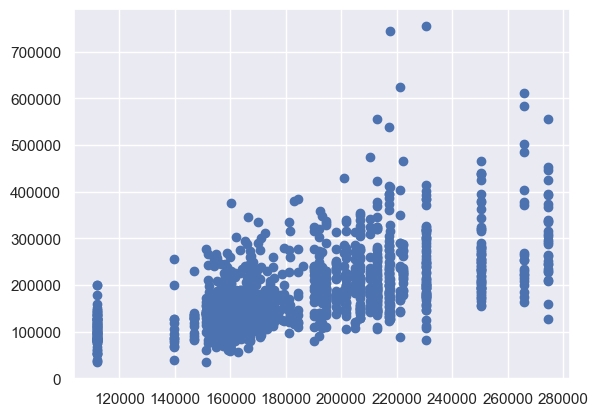

In [410]:
X_1 = encoder.transform(X)
plt.scatter(X_1['GarageYrBlt'],y)

In [399]:
X_1['GarageYrBlt'].value_counts()

111845.186362    81
212964.519452    65
250250.593607    59
206729.983475    53
217134.549315    50
                 ..
174928.359900     1
176646.541719     1
176746.541719     1
186291.996264     1
176973.814446     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [387]:
set(X.columns) - set(df.columns)

{'Utilities'}

In [511]:
ctd = {}
for i in range(4, 15):
    ctd[i] =  len([cname for cname in categorical if df[cname].nunique() >i])

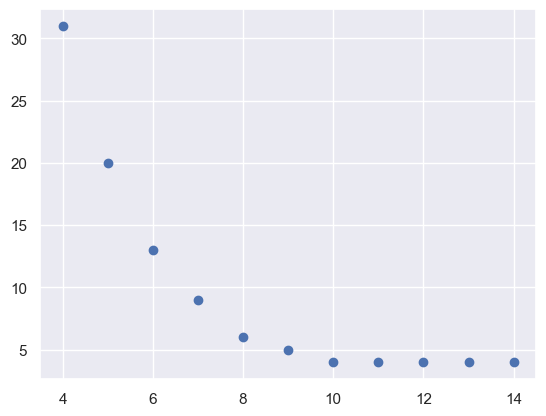

In [512]:
plt.plot(ctd.keys(),ctd.values(),'bo')

In [343]:
[cname for cname in categorical if df[cname].nunique() >15]

['Neighborhood', 'Exterior2nd', 'GarageYrBlt']

In [411]:
X_1.GarageYrBlt.value_counts()

111845.186362    81
212964.519452    65
250250.593607    59
206729.983475    53
217134.549315    50
                 ..
174928.359900     1
176646.541719     1
176746.541719     1
186291.996264     1
176973.814446     1
Name: GarageYrBlt, Length: 98, dtype: int64

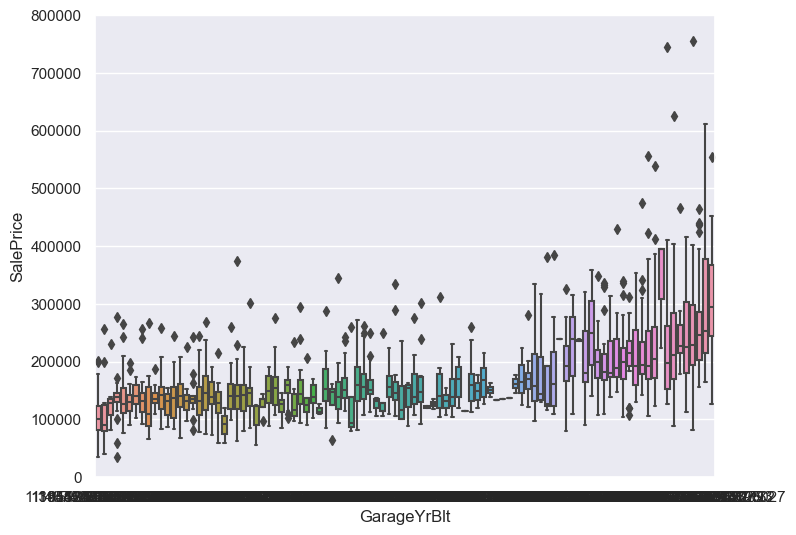

In [412]:
var = 'GarageYrBlt'
data = pd.concat([y, X_1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y=y, data=X_1)
fig.axis(ymin=0, ymax=800000);

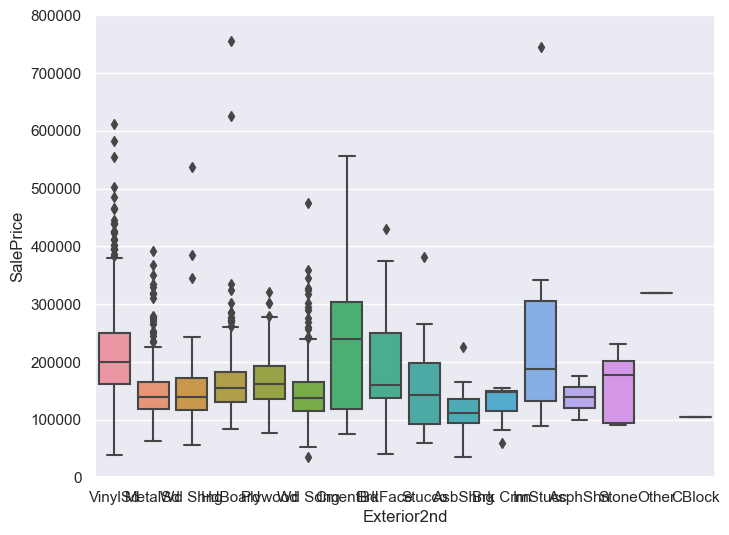

In [371]:
var = 'Exterior2nd'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

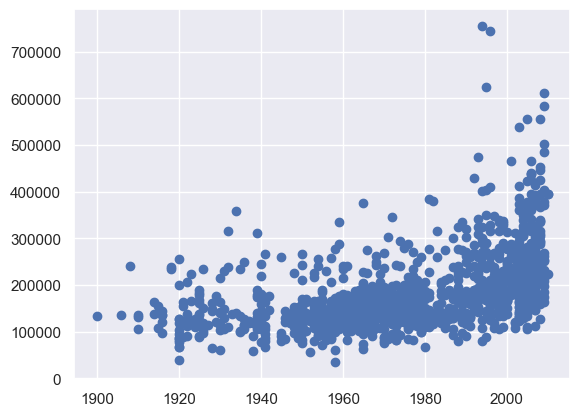

In [370]:
plt.scatter(train.GarageYrBlt,y)

In [40]:
from sklearn.preprocessing import LabelEncoder
X = []
lbl = LabelEncoder()
for c in mid_cardinality:
    df[c] = lbl.fit_transform(list(df[c].values))

In [42]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

In [603]:
len(numeric_feats)

66

In [43]:
from scipy.stats import skew
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 66 skewed numerical features to Box Cox transform


/var/folders/2f/wyk0znv51gl7345gxs6cvhyc0000gn/T/ipykernel_87194/1916324201.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)


In [44]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for i in skewed_features:
    df[i] = boxcox1p(df[i], lam)

In [45]:
df_new = pd.get_dummies(df)
print(df_new.shape)


(2919, 107)


In [47]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42) 
xgbr = XGBRegressor(learning_rate=0.01,
                       n_estimators=8000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)
lgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=6000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)
rfr = RandomForestRegressor(n_estimators=7000,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)
kf = KFold(n_splits = 5, shuffle = True, random_state = 123).get_n_splits(train.values)

In [46]:
print(train.shape)
print(test.shape)
print(df_new.shape)
dft = df_new[:train.shape[0]]
print(dft.shape)

(1460, 81)
(1459, 79)
(2919, 107)
(1460, 107)


In [48]:
y = np.log1p(y)

In [49]:
gbr_mse_cv_scores = - cross_val_score(gbr, dft.values,y,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
gbr_rmse_score = np.sqrt(gbr_mse_cv_scores)

xgbr_mse_cv_scores = - cross_val_score(xgbr, dft.values,y,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
xgbr_rmse_score = np.sqrt(xgbr_mse_cv_scores)

lgbm_mse_cv_scores = - cross_val_score(lgbm, dft.values,y,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
lgbm_rmse_score = np.sqrt(lgbm_mse_cv_scores)

rfr_mse_cv_scores = - cross_val_score(rfr, dft.values,y,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
rfr_rmse_score = np.sqrt(rfr_mse_cv_scores)

print('Gradient Boosting Regressor CV RMSE Score :', gbr_rmse_score.mean())
print('XGBoost Regressor CV RMSE Score :', xgbr_rmse_score.mean())
print('LightGBM Regressor CV RMSE Score :', lgbm_rmse_score.mean())
print('Random Forest Regressor CV RMSE Score :', rfr_rmse_score.mean())

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] baggi

In [528]:
type(train.GarageYrBlt[0])

numpy.float64

In [55]:
trn = df_new[:train.shape[0]]
tst =df_new[train.shape[0]:] 
xgbr.fit(trn,y)
xgbr_train_pred = xgbr.predict(trn)
xgbr_pred = np.expm1(xgbr.predict(tst.values))
rmse_xgbr = np.sqrt(mean_squared_error(y,xgbr_train_pred))
print(rmse_xgbr)

0.12113692112799226


In [81]:
lgbm.fit(trn, y)
lgbm_train_pred = lgbm.predict(trn)
lgbm_pred = np.expm1(lgbm.predict(tst.values))
rmse_lgbm = np.sqrt(mean_squared_error(y,lgbm_train_pred))
print(rmse_lgbm)

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.06146769332292132


In [80]:
gbr.fit(trn, y)
gbr_train_pred = gbr.predict(trn)
gbr_pred = np.expm1(gbr.predict(tst.values))
rmse_gbr = np.sqrt(mean_squared_error(y,gbr_train_pred))
print(rmse_gbr)

0.07112313685153816


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


# Ensemble

In [60]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [64]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, trn.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [65]:
averaged_models = AveragingModels(models = (gbr, xgbr, lgbm, rfr))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] baggi

In [66]:
averaged_models = AveragingModels(models = (gbr, xgbr, lgbm, rfr))

score = rmsle_cv(lgbm)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] baggi

In [70]:
len(lgbm_pred)

1459

In [79]:
xgbr_pred

AveragingModels(models=(GradientBoostingRegressor(learning_rate=0.01,
                                                  loss='huber', max_depth=4,
                                                  max_features='sqrt',
                                                  min_samples_leaf=15,
                                                  min_samples_split=10,
                                                  n_estimators=6000,
                                                  random_state=42),
                        XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7,
                                     early_stopping_rounds=None,
                                     enable_cat...
                        LGBMRegressor(bagging_fraction=0.8, bagging_freq=4,
                                      bagging_seed=8, feature_fraction=0.2,
                                      feature_fraction_seed=8,
                                      learning_rate=0.01, max_bin=200,
                                      min_sum_hessian_in_leaf=11,
                                      n_estimators=6000, num_leaves=6,
                                      objective='regression', random_state=42,
                                      verbose=-1),
                        RandomForestRegressor(max_depth=15, max_features=None,
                                              min_samples_leaf=5,
                                              min_samples_split=5,
                                              n_estimators=7000, oob_score=True,
                                              random_state=42)))

In [87]:
submission = pd.DataFrame()
submission['Id'] = j['Id']
submission['SalePrice'] = 0.5*gbr_pred+0.5*lgbm_pred
submission.to_csv("submission_lgbm_gbr.csv",index=False)

In [72]:
j = pd.read_csv("Data/test.csv")

In [84]:
len(gbr_pred)

1459

In [86]:
0.5*gbr_pred+0.5*lgbm_pred

array([123275.40857458, 163415.06881414, 187498.91804868, ...,
       165188.88726086, 118862.52019418, 216536.64945532])